*Extracting Image frames from source video*

In [2]:
# Importing all necessary libraries 
import cv2 
import os 
import imageio
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Read the video from specified path 
cam = cv2.VideoCapture("D:\paper\waterLevel\srcVideo\Timelapse of Alaska glacier melting from 1984 to 2020 ｜ Global warming.mp4") 

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21132\2670172441.py:2: SyntaxWarning: invalid escape sequence '\p'
  cam = cv2.VideoCapture("D:\paper\waterLevel\srcVideo\Timelapse of Alaska glacier melting from 1984 to 2020 ｜ Global warming.mp4")


In [6]:
try: 
	
	# creating a folder named data 
	if not os.path.exists('data'): 
		os.makedirs('data') 

# if not created then raise error 
except OSError: 
	print ('Error: Creating directory of data') 

# frame 
currentframe = 0

In [7]:
while(True): 
	
	# reading from frame 
	ret,frame = cam.read() 

	if ret: 
		# if video is still left continue creating images 
		name = './data/' + str(currentframe) + '.jpg'
		print ('Creating...' + name) 

		# writing the extracted images 
		cv2.imwrite(name, frame) 

		# increasing counter so that it will 
		# show how many frames are created 
		currentframe += 1
	else: 
		break


Creating..../data/0.jpg
Creating..../data/1.jpg
Creating..../data/2.jpg
Creating..../data/3.jpg
Creating..../data/4.jpg
Creating..../data/5.jpg
Creating..../data/6.jpg
Creating..../data/7.jpg
Creating..../data/8.jpg
Creating..../data/9.jpg
Creating..../data/10.jpg
Creating..../data/11.jpg
Creating..../data/12.jpg
Creating..../data/13.jpg
Creating..../data/14.jpg
Creating..../data/15.jpg
Creating..../data/16.jpg
Creating..../data/17.jpg
Creating..../data/18.jpg
Creating..../data/19.jpg
Creating..../data/20.jpg
Creating..../data/21.jpg
Creating..../data/22.jpg
Creating..../data/23.jpg
Creating..../data/24.jpg
Creating..../data/25.jpg
Creating..../data/26.jpg
Creating..../data/27.jpg
Creating..../data/28.jpg
Creating..../data/29.jpg
Creating..../data/30.jpg
Creating..../data/31.jpg
Creating..../data/32.jpg
Creating..../data/33.jpg
Creating..../data/34.jpg
Creating..../data/35.jpg
Creating..../data/36.jpg
Creating..../data/37.jpg
Creating..../data/38.jpg
Creating..../data/39.jpg
Creating..

In [8]:
# Release all space and windows once done 
cam.release() 
cv2.destroyAllWindows() 


In [4]:

# folder path
dir_path = r'D:\paper\waterLevel\data'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Total number of images Extracted:', count)


Total number of images Extracted: 300


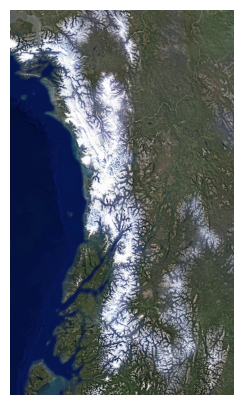

In [3]:
#Read and display one of the image from the images extracted
img = plt.imread("D:\\paper\\waterLevel\\data\\0.jpg")
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(img)
ax.axis('off')
plt.show()

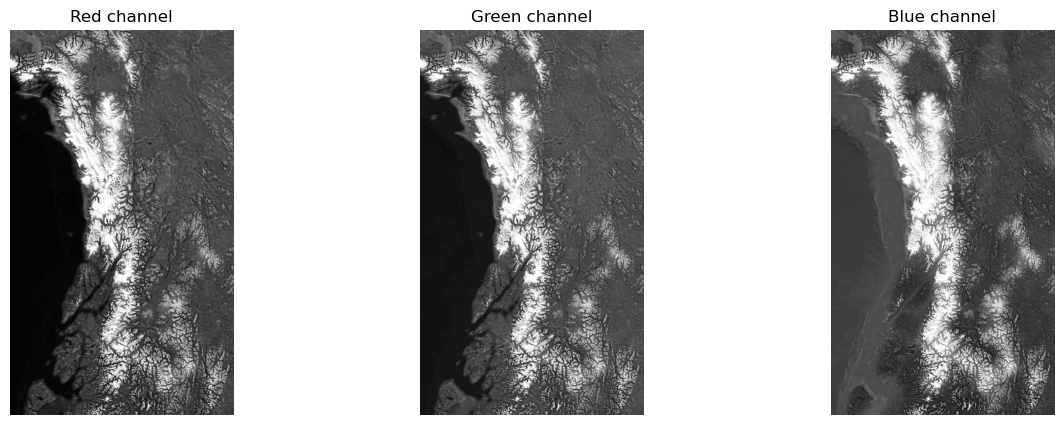

In [3]:
# Display RGB Split of image
image_path = "D:\\paper\\waterLevel\\data\\0.jpg" 
img1 = cv2.imread(image_path)
# Split the image into its RGB channels
b_channel, g_channel, r_channel = cv2.split(img1)
# Display RGB Split of image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(r_channel, cmap='gray')
axs[1].imshow(g_channel, cmap='gray')
axs[2].imshow(b_channel, cmap='gray')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

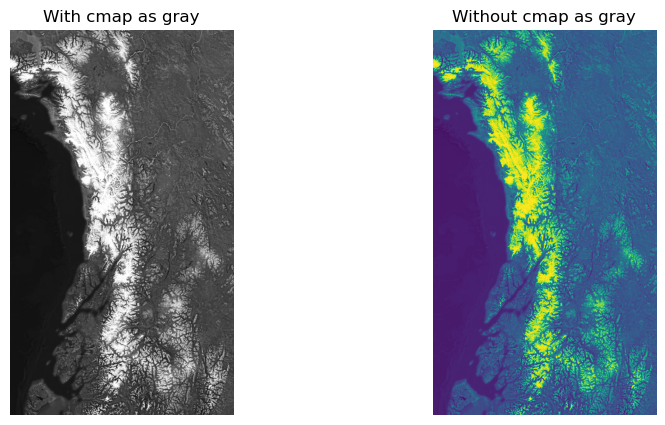

In [4]:
#converting img to grayscale
gray_img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].imshow(gray_img , cmap='gray')
ax[1].imshow(gray_img)
ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('With cmap as gray')
ax[1].set_title('Without cmap as gray')
plt.show()

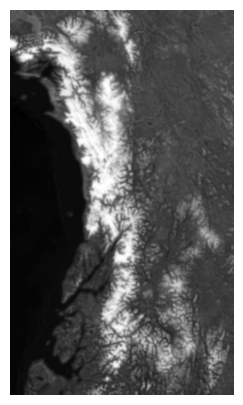

In [5]:
#Denoising
denoised_img = cv2.GaussianBlur(gray_img, (15, 15), 0)
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(denoised_img, cmap='gray')
ax.axis('off')
plt.show()

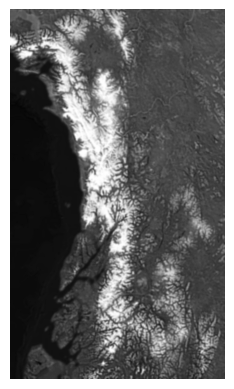

In [6]:
# Define a sharpening kernel
sharpening_kernel = np.array([[-1, -1, -1],
                               [-1, 9, -1],
                               [-1, -1, -1]])

# Apply the sharpening filter
sharpened_img = cv2.filter2D(denoised_img, -1, sharpening_kernel)
plt.imshow(sharpened_img, cmap='gray')
plt.axis('off')
"""

fig, axs = plt.subplots(figsize=(10, 5))
ax.imshow(sharpened_img, )  
ax.axis('off')
ax.set_title('Sharpened Image')
"""
plt.show()

In [7]:
#considering the sharpend image as orignal image
orignal_img = sharpened_img

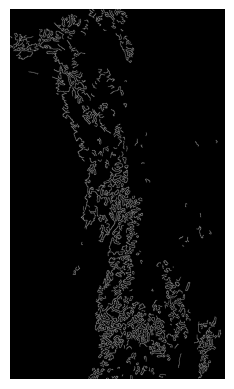

In [8]:
# Apply Canny edge detector
# The two parameters are the lower and upper thresholds for the hysteresis procedure
edges = cv2.Canny(orignal_img, 100, 200)
plt.imshow(edges, cmap='gray')  # Display edges in grayscale
plt.axis('off')


plt.show()

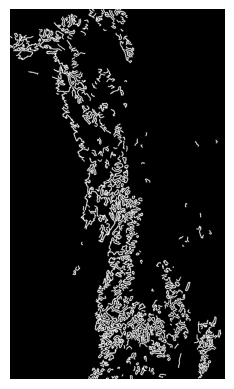

In [9]:
# Apply the Laplacian filter
laplacian = cv2.Laplacian(edges, cv2.CV_64F)  # Use CV_64F to avoid overflow

# Convert the result to uint8
laplacian_abs = cv2.convertScaleAbs(laplacian)

# Display  the Laplacian result


plt.imshow(laplacian_abs, cmap='gray')  # Display Laplacian result in grayscale
plt.axis('off')


plt.show()

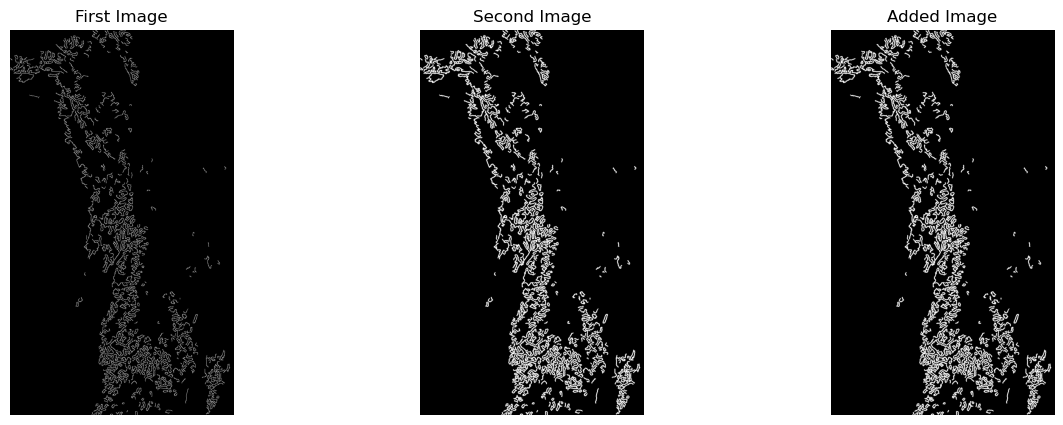

In [10]:
# Add the two images
added_image = cv2.add(edges,laplacian_abs)

# Display the original images and the added image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
axs[0].axis('off')
axs[0].set_title('First Image')

axs[1].imshow(cv2.cvtColor(laplacian_abs, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
axs[1].axis('off')
axs[1].set_title('Second Image')

axs[2].imshow(cv2.cvtColor(added_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
axs[2].axis('off')
axs[2].set_title('Added Image')

plt.show()

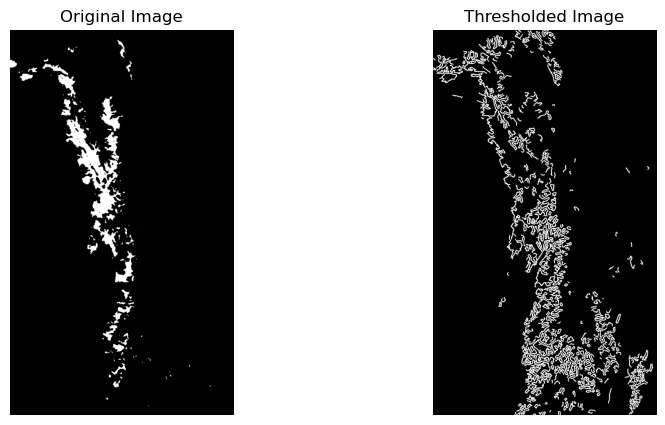

In [15]:
# Apply simple thresholding
# The second parameter is the threshold value, and the third is the maximum value to use with the THRESH_BINARY thresholding type
threshold_value = 220  # You can change this value
_, thresholded_img = cv2.threshold(added_image, threshold_value, 255, cv2.THRESH_BINARY)
_, thresholded_img1 = cv2.threshold(orignal_img, threshold_value, 255, cv2.THRESH_BINARY)
# Display the original image and the thresholded image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(thresholded_img1, cmap='gray') 
axs[0].axis('off')
axs[0].set_title('Original Image')

axs[1].imshow(thresholded_img, cmap='gray')  # Display thresholded image in grayscale
axs[1].axis('off')
axs[1].set_title('Thresholded Image')

plt.show()